In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *

In [7]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_my_processed_data.csv')
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.554,0.416,0.442,NaN,-0.288
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-0.704,0.668,0.539,NaN,0.159
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-0.659,1.152,0.205,NaN,1.051
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.391,1.270,0.752,NaN,1.100
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.007,-0.211,0.499,NaN,0.258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794728,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,1.381,1.846,1.702,NaN,NaN
794729,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.306,-0.107,-0.080,NaN,NaN
794730,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,0.363,0.261,0.060,NaN,NaN
794731,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,0.395,0.378,-0.030,NaN,NaN


In [8]:
MPRA_df = MPRA_df[MPRA_df['seq'].str.len() == 200].reset_index(drop=True)
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.554,0.416,0.442,NaN,-0.288
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-0.704,0.668,0.539,NaN,0.159
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-0.659,1.152,0.205,NaN,1.051
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.391,1.270,0.752,NaN,1.100
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.007,-0.211,0.499,NaN,0.258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,1.381,1.846,1.702,NaN,NaN
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.306,-0.107,-0.080,NaN,NaN
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,0.363,0.261,0.060,NaN,NaN
760677,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,0.395,0.378,-0.030,NaN,NaN


In [16]:
MPRA_df[MPRA_df['A549'].notna()]['OL'].value_counts()

OL
OL27    54715
OL29    49249
OL28    46906
OL33    44652
OL30    43230
OL32    41730
OL31    39014
Name: count, dtype: int64

In [17]:
MPRA_df[MPRA_df['HCT116'].notna()]['OL'].value_counts()

OL
OL41_42    426743
OL27         5149
OL28         3563
OL29         3309
OL30         3169
OL31         2538
OL32         1887
OL33         1745
Name: count, dtype: int64

In [15]:
MPRA_df[MPRA_df['A549'].notna() & MPRA_df['HCT116'].notna()]

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF
203,CAGGAGTCACAGCTGCCCGCACGCCCAGCTCGCCCCAGCCCCGCTG...,1:894573:G:A:A:wC,chr1,894573,G,A,alt,OL29,UKBB,2.796,2.895,2.327,3.898,2.609,-1.091,-0.687,-0.596,-6.602,-4.806,-7.698,-1.948,-3.933,-0.720,1.611,-1.078,-3.078,-5.435,-7.596,NaN,-4.084,0.212,1.883,-1.500,-3.902,NaN,-8.230,NaN,-2.999,-1.079,2.101,-0.555,-5.599,-4.466,-6.909,NaN,-4.606,-1.407,1.781,0.125,NaN,-5.871,NaN,-6.908,-3.474
204,CAGGAGTCACAGCTGCCCGCACGCCCAGCTCGCCCCAGCCCCGCTG...,1:894573:G:A:R:wC,chr1,894573,G,A,ref,OL29,UKBB,2.825,2.954,2.465,4.059,2.636,-1.101,-0.805,-0.573,-6.624,-4.818,-7.718,-1.940,-3.840,-0.745,1.500,-1.014,-3.127,-5.469,-7.552,NaN,-4.007,0.145,1.749,-1.463,-3.865,NaN,-8.171,NaN,-2.955,-1.128,1.978,-0.497,-5.539,-4.446,-6.892,NaN,-4.494,-1.437,1.674,0.151,NaN,-5.833,NaN,-6.870,-3.399
205,TGTGGGGGGCTTCCCGGGGAAGAAGGAAGGCGAGACCTAGGGGGGC...,1:895706:G:A:A:wC,chr1,895706,G,A,alt,OL29,UKBB,-0.272,0.132,1.091,0.318,-0.375,-8.520,-9.221,-8.888,-10.524,-9.313,-12.706,-4.145,-9.152,-8.502,-8.642,-8.925,-6.933,-9.919,-11.004,NaN,-9.934,-7.875,-8.000,-8.342,-6.386,NaN,-11.952,NaN,-9.921,-9.104,-7.642,-8.229,-7.532,-7.927,-10.242,NaN,-8.977,-8.648,-7.916,-8.745,NaN,-9.370,NaN,-10.518,-9.108
226,CGAGGGGGCCCAGGCAGGAGGGGAGGCTGCGGTGGCTTTGGCCGCC...,1:901559:G:A:A:wC,chr1,901559,G,A,alt,OL29,UKBB,0.861,1.696,0.740,0.642,0.748,-3.530,-5.582,-5.757,-7.590,-5.161,-9.461,-2.087,-6.158,-2.946,-4.331,-6.305,-4.053,-5.971,-8.423,NaN,-5.938,-1.931,-4.407,-5.288,-2.702,NaN,-9.018,NaN,-5.450,-2.299,-3.687,-4.748,-4.771,-2.794,-7.911,NaN,-5.932,-3.105,-3.845,-5.088,NaN,-4.909,NaN,-8.034,-5.577
228,CGAGGGGGCCCAGGCAGGAGGGGAGGCTGCGGTGGCTTTGGCCGCC...,1:901559:G:A:R:wC,chr1,901559,G,A,ref,OL29,UKBB,-0.381,0.511,-0.172,-0.310,-0.562,-4.772,-6.236,-6.712,-7.502,-6.106,-9.385,-2.244,-6.505,-3.499,-4.564,-6.394,-3.638,-6.118,-8.504,NaN,-6.203,-2.541,-5.030,-7.237,-2.679,NaN,-9.053,NaN,-6.153,-4.518,-4.738,-6.189,-4.945,-5.182,-7.795,NaN,-6.461,-4.560,-4.768,-6.548,NaN,-6.594,NaN,-7.988,-6.155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758674,TCAAGTGTCCTTGTTTAGCAGTCGGCTTCGGTCCTTCCTGAGTGAT...,X:142355162:NA:NA,chrX,142355162,NaN,NaN,NaN,OL27,UKBB,0.057,-0.300,-0.391,0.232,-0.536,-4.082,-7.660,-7.673,-8.938,-6.295,-10.659,-7.188,-9.123,-8.475,-9.429,-10.841,-6.951,-8.554,-10.648,NaN,-10.076,-2.741,-7.673,-8.503,-6.315,NaN,-9.939,NaN,-8.316,-6.824,-9.044,-9.507,-7.498,-8.289,-11.011,NaN,-9.750,-6.822,-9.835,-10.930,NaN,-9.886,NaN,-10.273,-9.631
758721,ACTGAGATGAGGTTGGTTTGCAAGAGTTAATGGAACTTTTGTTAAG...,X:147830448:NA:NA,chrX,147830448,NaN,NaN,NaN,OL27,UKBB,-0.477,-0.668,-0.091,-0.264,-0.300,-8.432,-11.366,-11.088,-9.592,-10.017,-12.347,-8.266,-11.198,-9.861,-11.271,-11.373,-8.089,-10.584,-11.314,NaN,-11.509,-6.547,-8.147,-6.099,-7.469,NaN,-11.562,NaN,-10.184,-5.996,-9.142,-8.283,-7.526,-6.919,-11.880,NaN,-9.532,-6.459,-9.383,-9.648,NaN,-8.249,NaN,-10.983,-10.089
758730,TGAAGTGGAAACCCTGAAGACTTCTTTTTATAAATCAGCATGCAGG...,X:148068137:NA:NA,chrX,148068137,NaN,NaN,NaN,OL27,UKBB,-0.482,-0.708,-0.714,-0.613,-0.517,-5.625,-9.724,-9.377,-9.320,-8.408,-11.339,-7.886,-5.063,-6.537,-9.001,-9.646,-7.395,-8.613,-10.505,NaN,-4.386,-6.380,-8.437,-9.072,-6.603,NaN,-9.974,NaN,-4.670,-4.463,-8.145,-8.33

In [9]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K36me3', 'H3K9me3', 'CTCF']

In [11]:
for i, cell_type in enumerate(cell_types):
    df = MPRA_df[ MPRA_df[f'{cell_type}'].notna()]
    true = df[f'{cell_type}']
    print(f"{true.mean():.3f}, {true.std():.3f}")

0.532, 1.185
0.466, 1.054
0.422, 1.175
0.422, 1.003
0.215, 0.654


In [12]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_feature_0529.csv')
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.709,-3.729,-5.499,-5.620,-7.278,-5.233,-8.731,-2.985,-5.719,-4.818,-4.984,-6.853,-3.876,-6.347,-7.907,NaN,-5.720,-4.297,-5.065,-6.959,-3.039,NaN,-7.790,NaN,-6.087,-4.122,-4.643,-5.941,-5.479,-5.439,-7.598,NaN,-5.599,-3.500,-4.236,-5.951,NaN,-6.587,NaN,-7.099,-5.150
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.266,-3.687,-5.445,-5.604,-7.250,-5.224,-8.707,-2.924,-5.765,-4.805,-4.937,-6.846,-3.891,-6.413,-7.923,NaN,-5.793,-4.170,-4.906,-6.837,-3.041,NaN,-7.814,NaN,-6.098,-4.111,-4.585,-5.896,-5.394,-5.372,-7.561,NaN,-5.651,-3.491,-4.125,-5.871,NaN,-6.552,NaN,-7.057,-5.198
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.619,-5.616,-8.213,-8.650,-8.338,-7.815,-10.701,-6.840,-8.355,-4.805,-6.109,-7.566,-6.314,-5.830,-10.344,NaN,-7.261,-6.681,-6.365,-6.456,-6.016,NaN,-9.288,NaN,-7.791,-3.584,-6.708,-6.793,-6.096,-5.219,-10.393,NaN,-7.252,-2.482,-5.822,-7.466,NaN,-6.673,NaN,-9.750,-7.006
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.668,-5.402,-7.903,-8.314,-8.168,-7.640,-10.673,-6.845,-8.255,-4.791,-5.761,-7.334,-6.196,-5.684,-10.297,NaN,-7.263,-6.351,-5.831,-5.892,-6.031,NaN,-9.298,NaN,-7.564,-3.601,-6.489,-6.609,-5.966,-5.112,-10.508,NaN,-7.210,-2.437,-5.375,-7.054,NaN,-6.412,NaN,-9.720,-6.954
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.168,-8.219,-10.384,-9.864,-9.135,-9.694,-12.692,-8.637,-10.799,-9.580,-9.774,-10.401,-7.371,-9.600,-11.485,NaN,-11.242,-8.547,-9.190,-9.197,-7.587,NaN,-12.028,NaN,-11.238,-8.025,-9.397,-9.246,-7.205,-8.969,-12.176,NaN,-9.806,-7.934,-9.507,-10.218,NaN,-9.958,NaN,-11.013,-10.371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,-1.869,-4.290,-5.463,-6.614,-4.801,-7.704,-1.766,-5.451,-2.745,-3.408,-6.452,-4.101,-5.933,-7.847,NaN,-5.345,-0.324,-2.255,-5.013,-2.527,NaN,-8.024,NaN,-3.944,-1.485,-2.670,-4.878,-4.243,-4.165,-6.672,NaN,-5.477,-0.867,-2.169,-3.957,NaN,-5.455,NaN,-6.570,-4.570
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.547,-0.429,NaN,NaN,-7.313,-10.187,-9.871,-9.353,-9.003,-11.804,-8.000,-10.233,-8.482,-10.009,-10.216,-7.432,-8.972,-10.877,NaN,-10.184,-5.639,-9.002,-9.540,-7.253,NaN,-10.796,NaN,-9.800,-7.186,-9.300,-9.304,-7.324,-8.922,-11.447,NaN,-9.337,-6.454,-9.606,-10.214,NaN,-9.878,NaN,-10.126,-9.423
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.146,-0.200,-0.310,NaN,NaN,-6.397,-9.274,-8.510,-9.010,-7.823,-10.773,-7.456,-9.099,-6.260,-8.046,-8.115,-7.010,-6.637,-10.394,NaN,-8.128,-5.352,-7.720,-6.763,-6.161,NaN,-9.251,NaN,-8.176,-4.156,-7.552,-6.779,-6.991,-5.526,-10.623

In [3]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K36me3', 'H3K9me3', 'CTCF']

In [14]:
for i, cell_type in enumerate(cell_types):
    for assay in assays[:1]:
        df = MPRA_df
        x = df[f'{cell_type}_{assay}']
        print(f'{cell_type}_{assay}', f"{x.mean():.3f}", f"{x.std():.3f}")

K562_DNase -6.463 1.948
HepG2_DNase -7.478 2.141
SK-N-SH_DNase -6.487 1.899
HCT116_DNase -5.984 2.079
A549_DNase -5.672 2.001


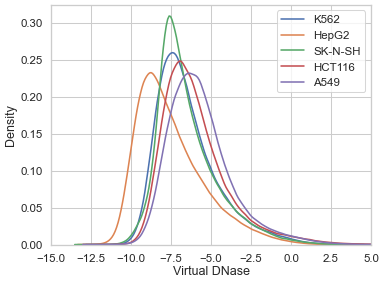

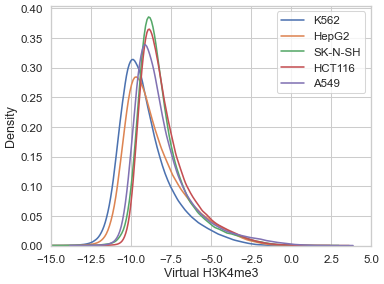

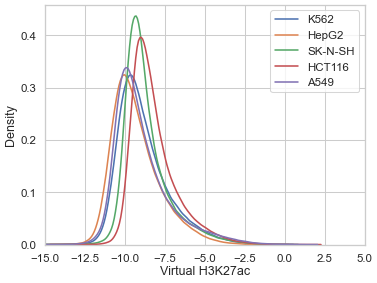

/tmp/ipykernel_99551/2507127044.py:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


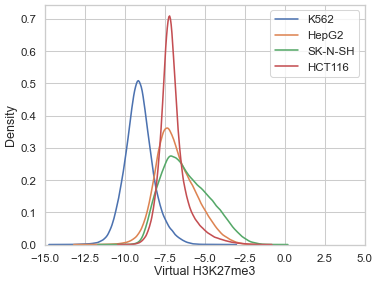

/tmp/ipykernel_99551/2507127044.py:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


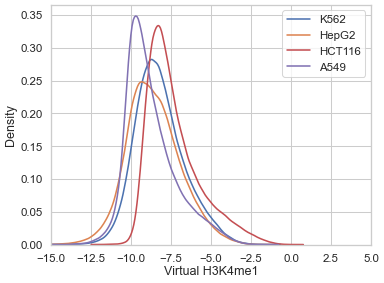

/tmp/ipykernel_99551/2507127044.py:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


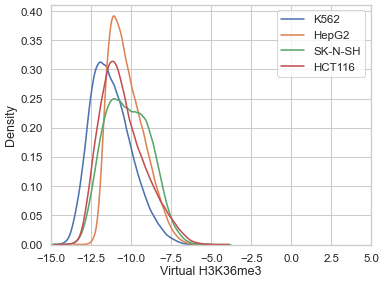

/tmp/ipykernel_99551/2507127044.py:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)
/tmp/ipykernel_99551/2507127044.py:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)
/tmp/ipykernel_99551/2507127044.py:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


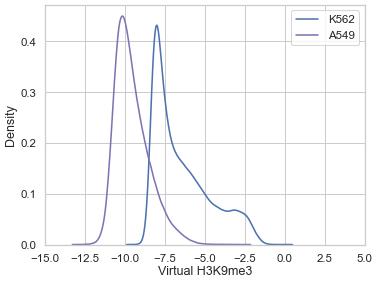

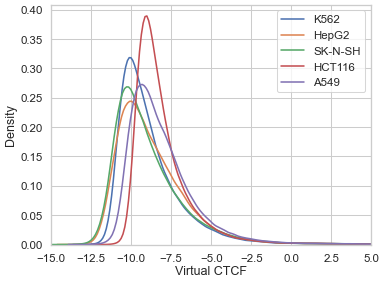

In [6]:
for j, assay in enumerate(assays):
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

    for i, cell_type in enumerate(cell_types):
        x = MPRA_df[f'{cell_type}_{assay}']
        sns.kdeplot(x, label=cell_type)

    plt.xlim(-15, 5)
    plt.xlabel(f'Virtual {assay}')
    plt.ylabel('Density')
    plt.legend()
    plt.savefig(f'figures/Gosai_MPRA_Sei_{assay}_distribution.png', dpi=400)
    plt.show()

In [2]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_feature_0529.csv')
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.709,-3.729,-5.499,-5.620,-7.278,-5.233,-8.731,-2.985,-5.719,-4.818,-4.984,-6.853,-3.876,-6.347,-7.907,NaN,-5.720,-4.297,-5.065,-6.959,-3.039,NaN,-7.790,NaN,-6.087,-4.122,-4.643,-5.941,-5.479,-5.439,-7.598,NaN,-5.599,-3.500,-4.236,-5.951,NaN,-6.587,NaN,-7.099,-5.150
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.266,-3.687,-5.445,-5.604,-7.250,-5.224,-8.707,-2.924,-5.765,-4.805,-4.937,-6.846,-3.891,-6.413,-7.923,NaN,-5.793,-4.170,-4.906,-6.837,-3.041,NaN,-7.814,NaN,-6.098,-4.111,-4.585,-5.896,-5.394,-5.372,-7.561,NaN,-5.651,-3.491,-4.125,-5.871,NaN,-6.552,NaN,-7.057,-5.198
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.619,-5.616,-8.213,-8.650,-8.338,-7.815,-10.701,-6.840,-8.355,-4.805,-6.109,-7.566,-6.314,-5.830,-10.344,NaN,-7.261,-6.681,-6.365,-6.456,-6.016,NaN,-9.288,NaN,-7.791,-3.584,-6.708,-6.793,-6.096,-5.219,-10.393,NaN,-7.252,-2.482,-5.822,-7.466,NaN,-6.673,NaN,-9.750,-7.006
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.668,-5.402,-7.903,-8.314,-8.168,-7.640,-10.673,-6.845,-8.255,-4.791,-5.761,-7.334,-6.196,-5.684,-10.297,NaN,-7.263,-6.351,-5.831,-5.892,-6.031,NaN,-9.298,NaN,-7.564,-3.601,-6.489,-6.609,-5.966,-5.112,-10.508,NaN,-7.210,-2.437,-5.375,-7.054,NaN,-6.412,NaN,-9.720,-6.954
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.168,-8.219,-10.384,-9.864,-9.135,-9.694,-12.692,-8.637,-10.799,-9.580,-9.774,-10.401,-7.371,-9.600,-11.485,NaN,-11.242,-8.547,-9.190,-9.197,-7.587,NaN,-12.028,NaN,-11.238,-8.025,-9.397,-9.246,-7.205,-8.969,-12.176,NaN,-9.806,-7.934,-9.507,-10.218,NaN,-9.958,NaN,-11.013,-10.371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,-1.869,-4.290,-5.463,-6.614,-4.801,-7.704,-1.766,-5.451,-2.745,-3.408,-6.452,-4.101,-5.933,-7.847,NaN,-5.345,-0.324,-2.255,-5.013,-2.527,NaN,-8.024,NaN,-3.944,-1.485,-2.670,-4.878,-4.243,-4.165,-6.672,NaN,-5.477,-0.867,-2.169,-3.957,NaN,-5.455,NaN,-6.570,-4.570
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.547,-0.429,NaN,NaN,-7.313,-10.187,-9.871,-9.353,-9.003,-11.804,-8.000,-10.233,-8.482,-10.009,-10.216,-7.432,-8.972,-10.877,NaN,-10.184,-5.639,-9.002,-9.540,-7.253,NaN,-10.796,NaN,-9.800,-7.186,-9.300,-9.304,-7.324,-8.922,-11.447,NaN,-9.337,-6.454,-9.606,-10.214,NaN,-9.878,NaN,-10.126,-9.423
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.146,-0.200,-0.310,NaN,NaN,-6.397,-9.274,-8.510,-9.010,-7.823,-10.773,-7.456,-9.099,-6.260,-8.046,-8.115,-7.010,-6.637,-10.394,NaN,-8.128,-5.352,-7.720,-6.763,-6.161,NaN,-9.251,NaN,-8.176,-4.156,-7.552,-6.779,-6.991,-5.526,-10.623

In [3]:
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
cell_types = ['K562', 'HepG2', 'SK-N-SH']

In [11]:
def fast_pearsonr(preds, trues):
    pred_mean = preds.mean(axis=1, keepdims=True)
    true_mean = trues.mean(axis=1, keepdims=True)
    
    pred_centered = preds - pred_mean
    true_centered = trues - true_mean

    numerator = np.sum(pred_centered * true_centered, axis=1)
    denominator = np.sqrt(np.sum(pred_centered**2, axis=1)) * np.sqrt(np.sum(true_centered**2, axis=1))
    
    r = numerator / denominator
    return r



# 不标准化，同一条序列不同细胞类型之间，相关性
for assay in assays:
    cols = [f'{cell_type}_{assay}' for cell_type in cell_types]
    x = MPRA_df[cols].values  # shape: (num_seq, num_cell)
    y = MPRA_df[cell_types].values  # shape: (num_seq, num_cell)

    # 假设 preds 和 trues 是 shape (N, M) 的 numpy 数组
    # 每一行是一个样本，每一列是一个特征
    r_list = fast_pearsonr(x, y)
    cond = (y.std(axis=1) > 1)
    print(assay, r_list.mean(), r_list[cond].mean())

DNase 0.14632476029044272 0.3865479421244894
H3K4me3 0.1973775403284537 0.4996969299892234
H3K27ac 0.1935801836510114 0.4673875077191885
CTCF 0.1371847967227595 0.38264805471592334


DNase 0.14632476029044272 0.3865479421244894


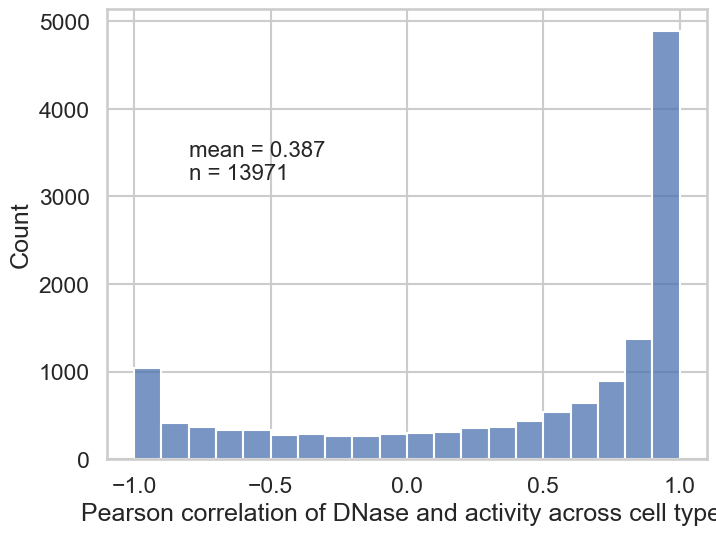

In [29]:
# 标准化，同一条序列不同细胞类型之间，相关性


for assay in ['DNase']:
    cols = [f'{cell_type}_{assay}' for cell_type in cell_types]
    x = MPRA_df[cols].values  # shape: (num_seq, num_cell)
    y = MPRA_df[cell_types].values  # shape: (num_seq, num_cell)

    r_list = fast_pearsonr(x, y)

    cond = (y.std(axis=1) > 1)
    print(assay, r_list.mean(), r_list[cond].mean())



sns.set_theme(context='talk', style='whitegrid')
plt.figure(figsize=(8, 6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9)

# sns.histplot(r_list, binwidth=1e-2)
x = r_list[cond]
sns.histplot(x, binwidth=1e-1)

plt.text(x=-0.8, y=3200, fontsize=16, 
         s=f'mean = {x.mean():.3f} \nn = {len(x)}', )

# plt.xlim(-4, 4)
# plt.ylim(-6, 6)
plt.xlabel(f'Count')
plt.xlabel(f'Pearson correlation of DNase and activity across cell types')
plt.savefig(f'figures/Gosai_MPRA_Sei_correlation_across_cell_types.png', dpi=400)
plt.show()

In [7]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_feature_0529_norm.csv')
MPRA_df


,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.719,1.390,2.062,1.980,1.975,1.896,1.928,1.882,1.568,1.227,1.828,1.575,2.338,1.326,2.126,NaN,1.335,1.136,1.808,1.173,2.097,NaN,1.748,NaN,1.230,0.887,1.954,1.554,1.663,1.130,2.058,NaN,1.344,1.077,2.016,1.678,NaN,1.378,NaN,2.238,1.398
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.250,1.411,2.094,1.990,2.005,1.902,1.947,1.916,1.545,1.233,1.853,1.580,2.326,1.287,2.111,NaN,1.302,1.203,1.905,1.257,2.096,NaN,1.731,NaN,1.225,0.892,1.990,1.585,1.758,1.171,2.085,NaN,1.316,1.081,2.076,1.723,NaN,1.399,NaN,2.277,1.375
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.685,0.425,0.468,0.103,0.818,0.243,0.401,-0.257,0.243,1.233,1.237,1.110,0.390,1.633,-0.085,NaN,0.645,-0.110,1.016,1.521,0.093,NaN,0.667,NaN,0.481,1.145,0.696,0.963,0.973,1.262,0.080,NaN,0.440,1.584,1.169,0.821,NaN,1.323,NaN,-0.209,0.514
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.737,0.535,0.650,0.311,1.004,0.355,0.423,-0.260,0.293,1.239,1.420,1.261,0.485,1.719,-0.043,NaN,0.644,0.063,1.342,1.911,0.083,NaN,0.660,NaN,0.581,1.136,0.829,1.091,1.118,1.327,-0.002,NaN,0.463,1.607,1.408,1.054,NaN,1.488,NaN,-0.181,0.539
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.147,-0.905,-0.808,-0.649,-0.051,-0.960,-1.142,-1.254,-0.986,-0.986,-0.688,-0.744,-0.454,-0.600,-1.121,NaN,-1.136,-1.086,-0.706,-0.376,-0.965,NaN,-1.311,NaN,-1.033,-0.986,-0.944,-0.738,-0.269,-0.997,-1.182,NaN,-0.956,-1.133,-0.800,-0.735,NaN,-0.756,NaN,-1.374,-1.089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,2.340,2.772,2.077,2.699,2.173,2.724,2.559,1.704,2.190,2.655,1.838,2.159,1.572,2.181,NaN,1.503,3.214,3.521,2.520,2.442,NaN,1.579,NaN,2.171,2.152,3.157,2.291,3.047,1.898,2.714,NaN,1.411,2.389,3.121,2.806,NaN,2.094,NaN,2.726,1.675
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.547,-0.429,NaN,NaN,-0.442,-0.692,-0.653,-0.289,-0.518,-0.454,-0.900,-0.701,-0.476,-0.811,-0.623,-0.503,-0.229,-0.569,NaN,-0.662,0.435,-0.592,-0.613,-0.740,NaN,-0.422,NaN,-0.401,-0.583,-0.885,-0.778,-0.403,-0.969,-0.667,NaN,-0.700,-0.395,-0.853,-0.732,NaN,-0.705,NaN,-0.555,-0.637
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.146,-0.200,-0.310,NaN,NaN,0.026,-0.156,0.190,0.085,0.238,0.346,-0.599,-0.131,0.557,0.220,0.750,-0.166,1.155,-0.130,NaN,0.258,0.585,0.190,1.309,-0.005,NaN,0.694,NaN,0.312,0.870,0.181,0.972,-0.029,1.078,-0.083,NaN,0.099,1.263,0.912,1.407,NaN,1.855,NaN,0.355,0.310
760677,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,-0.119,-0.090,-0.387,NaN,NaN,0.131,-0.177,-0.151,

In [8]:
def fast_pearsonr(preds, trues):
    pred_mean = preds.mean(axis=1, keepdims=True)
    true_mean = trues.mean(axis=1, keepdims=True)
    
    pred_centered = preds - pred_mean
    true_centered = trues - true_mean

    numerator = np.sum(pred_centered * true_centered, axis=1)
    denominator = np.sqrt(np.sum(pred_centered**2, axis=1)) * np.sqrt(np.sum(true_centered**2, axis=1))
    
    r = numerator / denominator
    return r



# 标准化，同一条序列不同细胞类型之间，相关性
for assay in assays:
    cols = [f'{cell_type}_{assay}' for cell_type in cell_types]
    preds = MPRA_df[cols].values  # shape: (num_seq, num_cell)
    trues = MPRA_df[cell_types].values  # shape: (num_seq, num_cell)

    # 假设 preds 和 trues 是 shape (N, M) 的 numpy 数组
    # 每一行是一个样本，每一列是一个特征
    r_list = fast_pearsonr(preds, trues)

    cond = (trues.std(axis=1) > 1)
    print(assay, r_list.mean(), r_list[cond].mean())

DNase 0.14632476029044272 0.3865479421244894
H3K4me3 0.1973775403284537 0.4996969299892234
H3K27ac 0.1935801836510114 0.4673875077191885
CTCF 0.1371847967227595 0.38264805471592334


DNase 0.14602955358975692 0.27835231047415937


<Axes: ylabel='Count'>

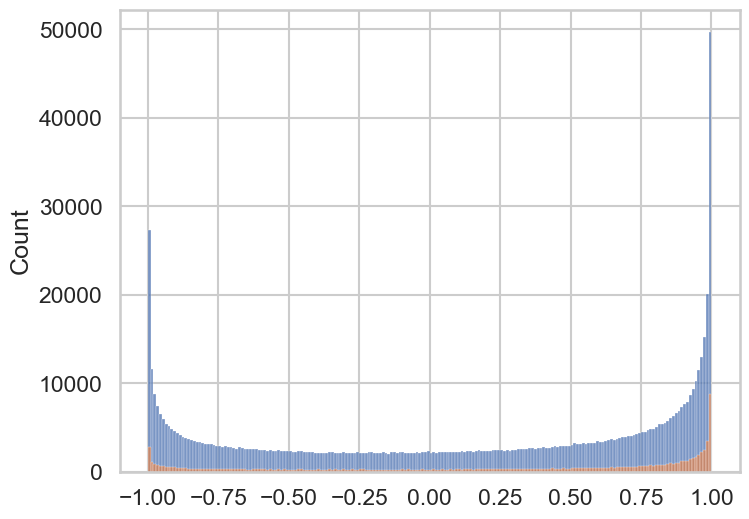

In [10]:
# 标准化，同一条序列不同细胞类型之间，相关性
for assay in ['DNase']:
    cols = [f'{cell_type}_{assay}' for cell_type in cell_types]
    preds = MPRA_df[cols].values  # shape: (num_seq, num_cell)
    mean = preds.mean(axis=0, keepdims=True)
    # print(mean.shape)
    std = preds.std(axis=0, keepdims=True)
    preds = (preds - mean) / std

    trues = MPRA_df[cell_types].values  # shape: (num_seq, num_cell)

    r_list = fast_pearsonr(preds, trues)

    cond = (trues.std(axis=1) > 0.5)
    print(assay, r_list.mean(), r_list[cond].mean())

sns.histplot(r_list, binwidth=1e-2)
sns.histplot(r_list[cond], binwidth=1e-2)

In [2]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_feature_0529_norm.csv')

0.53523260377335 0.3594640817512562


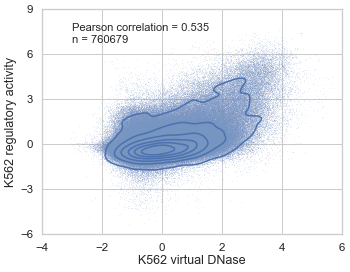

In [22]:
sns.set_theme(context='talk', style='whitegrid')
plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9)

cell_type = 'K562'
assay = 'DNase'

x = MPRA_df[f'{cell_type}_{assay}']
y = MPRA_df[f'{cell_type}']
r = pearson(x, y)[0]
r2 = spearman(x, y)[0]
print(r, r2)

g = sns.scatterplot(x=x, y=y, s=1, alpha=0.3)
g = sns.kdeplot(x=x[:10000], y=y[:10000], gridsize=100, levels=7)
plt.text(
    x=0.1, y=0.85, transform=g.transAxes, fontsize=16,
    s=f'Pearson correlation = {r:.3f} \nn = {len(x)}', 
)

plt.xlim(-4, 6)
plt.ylim(-6, 9)
plt.xticks([-4, -2, 0, 2, 4, 6])
plt.yticks([-6, -3, 0, 3, 6, 9])

plt.xlabel(f'{cell_type} virtual DNase')
plt.ylabel(f'{cell_type} regulatory activity')
plt.savefig(f'figures_pdf/Gosai_MPRA_Sei_{cell_type}_{assay}_vs_activity_scatter.png', dpi=400)
plt.savefig(f'figures_pdf/Gosai_MPRA_Sei_{cell_type}_{assay}_vs_activity_scatter.pdf')
plt.show()

0.3050754312887571 0.2255531472863943


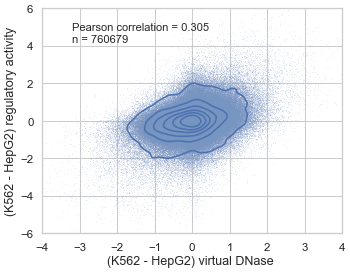

In [23]:
sns.set_theme(context='talk', style='whitegrid')
plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9)

cell_type = 'K562'
cell_type_2 = 'HepG2'
assay = 'DNase'

x = MPRA_df[f'{cell_type}_{assay}'] - MPRA_df[f'{cell_type_2}_{assay}']
y = MPRA_df[f'{cell_type}'] - MPRA_df[f'{cell_type_2}']
r = pearson(x, y)[0]
r2 = spearman(x, y)[0]
print(r, r2)

g = sns.scatterplot(x=x, y=y, s=1, alpha=0.3)
g = sns.kdeplot(x=x[:10000], y=y[:10000], gridsize=100, levels=7)
plt.text(
    x=0.1, y=0.85, transform=g.transAxes, fontsize=16,
    s=f'Pearson correlation = {r:.3f} \nn = {len(x)}', 
)

plt.xlim(-4, 4)
plt.ylim(-6, 6)
plt.xlabel(f'({cell_type} - {cell_type_2}) virtual {assay} ')
plt.ylabel(f'({cell_type} - {cell_type_2}) regulatory activity')
plt.savefig(f'figures_pdf/Gosai_MPRA_Sei_{cell_type}_{cell_type_2}_{assay}_vs_activity_scatter.png', dpi=400)
plt.savefig(f'figures_pdf/Gosai_MPRA_Sei_{cell_type}_{cell_type_2}_{assay}_vs_activity_scatter.pdf')
plt.show()

0.5273795592950066 0.4876885907208658


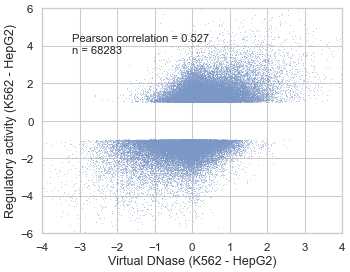

In [73]:
# sns.set_theme(context='talk', style='whitegrid')
# plt.figure(figsize=(8, 6), dpi=50)
# plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9)

# x = MPRA_df[f'K562_DNase'] - MPRA_df[f'HepG2_DNase']
# y = MPRA_df[f'K562'] - MPRA_df[f'HepG2']

# cond = (y.abs() > 1)
# x = x[cond]
# y = y[cond]

# r = pearson(x, y)[0]
# r2 = spearman(x, y)[0]
# print(r, r2)

# g = sns.scatterplot(x=x, y=y, s=1)
# plt.text(
#     x=0.1, y=0.8, transform=g.transAxes, fontsize=16,
#     s=f'Pearson correlation = {r:.3f} \nn = {len(x)}', 
# )

# plt.xlim(-4, 4)
# plt.ylim(-6, 6)
# plt.xlabel(f'Virtual {assay} (K562 - HepG2)')
# plt.ylabel(f'Regulatory activity (K562 - HepG2)')
# plt.savefig(f'figures/Gosai_MPRA_Sei_{assay}_K562-HepG2_diff.png', dpi=400)
# plt.show()

In [37]:
# 不标准化，合并不同细胞类型，相关性

for j, assay in enumerate(assays):
    pred_list = []
    true_list = []
    for i, cell_type in enumerate(cell_types):
        pred = MPRA_df[f'{cell_type}_{assay}']
        true = MPRA_df[cell_type]
        pred_list.append(pred)
        true_list.append(true)
    
    pred_list = np.concatenate(pred_list)
    true_list = np.concatenate(true_list)

    r, _ = pearson(pred_list, true_list)
    print(assay, r)

DNase 0.46668278948444275
H3K4me3 0.4799839543623713
H3K27ac 0.46959975942969495
CTCF 0.3778155591560792


In [38]:
# 标准化，合并不同细胞类型，相关性

for j, assay in enumerate(assays):
    pred_list = []
    true_list = []
    for i, cell_type in enumerate(cell_types):
        pred = MPRA_df[f'{cell_type}_{assay}']
        true = MPRA_df[cell_type]
        mean = pred.mean()
        std  = pred.std()
        pred = (pred - mean) / std

        pred_list.append(pred)
        true_list.append(true)
    
    pred_list = np.concatenate(pred_list)
    true_list = np.concatenate(true_list)

    r, _ = pearson(pred_list, true_list)
    print(assay, r)

DNase 0.47942067151309437
H3K4me3 0.49323408783421574
H3K27ac 0.4767878468762306
CTCF 0.3796738394846004
